----------
**Pima Indians Diabetes - EDA & Prediction (0.776%)**
=====================================

* **Accuracy - Decision Tree : 70.77%**


***Qasim Hassan*** <br>
***02-132182-028***<br>
***Course: Artificial Intelligence*** <br>
***Submitted to : Ma'am Nabiha Faisal***


*July 2021*

----------

### TABLE OF CONTENT

- <a href='#1'>1. Load libraries and read the data</a>  

    - <a href='#1.1'>1.1. Load libraries</a> 
    - <a href='#1.2'>1.2. Read the data</a> 
    
- <a href='#2'>2. Overview</a> 

    - <a href='#2.1'>2.1. Head</a> 
    - <a href='#2.2'>2.2. Target</a> 
    - <a href='#2.3'>2.3. Missing values</a> 
    
- <a href='#3'>3. Replace missing values and EDA</a>

    - <a href='#3.1'>3.1. Insulin</a> 
    - <a href='#3.2'>3.2. Glucose</a> 
    - <a href='#3.3'>3.3. SkinThickness</a>
    - <a href='#3.4'>3.4. BloodPressure</a>
    - <a href='#3.5'>3.5. BMI</a>
    
- <a href='#4'>4. New features (16) and EDA</a>

- <a href='#5'>5. Prepare dataset</a> 
    - <a href='#5.1'>5.1. StandardScaler and LabelEncoder</a> 
    - <a href='#5.2'>5.2. Correlation Matrix</a>
    
- <a href='#6'>6.Machine Learning</a> 

    - <a href='#6.1'>6.1. Decision Tree Algorithm</a> 
    - <a href='#6.2'>6.2. How does the Decision Tree algorithm work?</a>
    - <a href='#6.3'>6.3. Decision Tree Classifier Building in Scikit-learn</a>
    - <a href='#6.4'>6.4. Model Performance</a>
    
- <a href='#7'>7. Credits</a> 

# Who is Pima Indians ?

"The Pima (or Akimel O'odham, also spelled Akimel O'otham, "River People", formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona. The majority population of the surviving two bands of the Akimel O'odham are based in two reservations: the Keli Akimel O'otham on the Gila River Indian Community (GRIC) and the On'k Akimel O'odham on the Salt River Pima-Maricopa Indian Community (SRPMIC)." Wikipedia

![](http://image.noelshack.com/fichiers/2019/06/1/1549305367-0-0-0-0-pima.jpg)

# <a id='1'>1. Load libraries and read the data</a> 

## <a id='1.1'>1.1. Load libraries</a> 

Loading the libraries

In [4]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm


# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

## <a id='1.2'>1.2. Read data</a> 

Loading dataset with pandas (pd)

In [5]:
data = pd.read_csv('./data/')

# <a id='2'>2. Overview</a> 

## <a id='2.1'>2.1. Head</a> 

Checking data head and info

In [6]:
display(data.info(),data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# What is diabetes ? 
Acccording to NIH, "**Diabetes** is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.

**What are the different types of diabetes?**
The most common types of diabetes are type 1, type 2, and gestational diabetes.

**Type 1 diabetes**
If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

**Type 2 diabetes**
If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

**Gestational diabetes**
Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

**Other types of diabetes**
Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."

## <a id='2.2'>2.2 Target</a> 

What's target's distribution ? 

The above graph shows that the data is unbalanced. The number of non-diabetic is 268 the number of diabetic patients is 500

In [7]:
# 2 datasets
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [8]:
target_count()
target_percent()

## <a id='2.3'>2.3. Missing values</a> 

We saw on data.head() that some features contain 0, it doesn't make sense here and this indicates missing value
Below we replace 0 value by NaN :

In [9]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

Now, we can look at where are missing values : 

In [10]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    

In [11]:
# Plotting 
missing_plot(data, 'Outcome')

Missing values : 
* Insulin = 48.7% - 374
* SkinThickness = 29.56% - 227
* BloodPressure = 4.56% - 35
* BMI = 1.43% - 11
* Glucose = 0.65% - 5

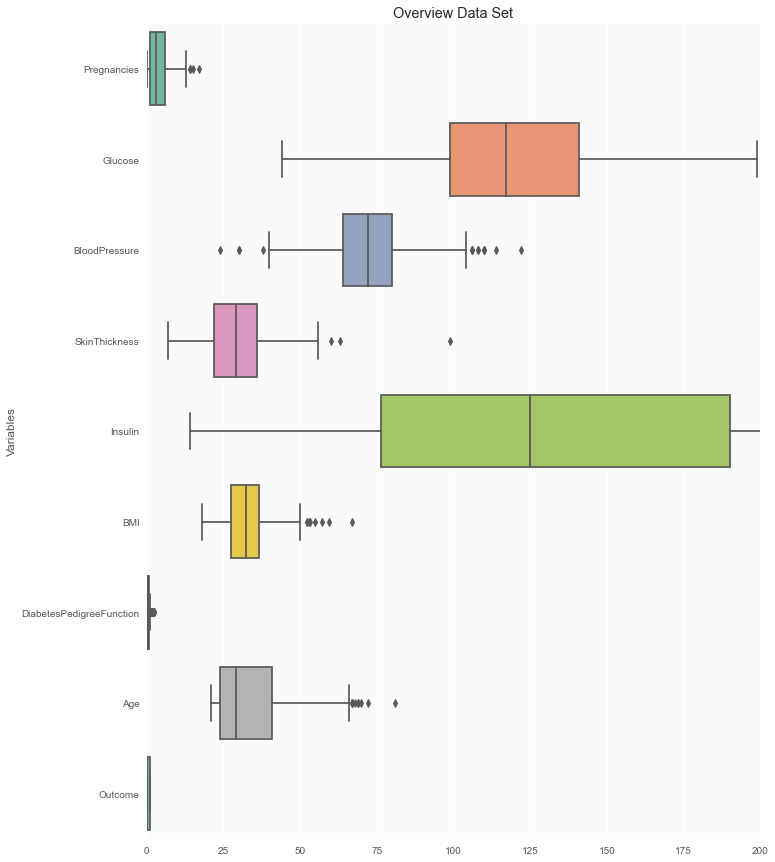

In [12]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

OK, all missing values are encoded with NaN value

**To fill these Nan values the data distribution needs to be understood against the target**. 

In [13]:
def correlation_plot():
    #correlation
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

A **correlation matrix** is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation.

In [14]:
correlation_plot()


Below, you can see the accuracy of LGBM with replacement of the NaN values by the variable's mean (same results with the median)

![](http://image.noelshack.com/fichiers/2019/06/1/1549276143-0-0-0.png)

To replace missing values, we'll use median by target (Outcome)

# <a id='3'>3. Replace missing values and EDA</a> 

In [15]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

## <a id='3.1'>3.1. Insulin</a> 

* **Insulin** : 2-Hour serum insulin (mu U/ml)

In [16]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [17]:
plot_distribution('Insulin', 0)

In [18]:
median_target('Insulin')

Outcome  Insulin
0        0    102.5
1        1    169.5

Insulin's medians by the target are really different ! 102.5 for a healthy person and 169.5 for a diabetic person

In [19]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

## <a id='3.2'>3.2. Glucose</a> 

* **Glucose** : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

In [20]:
plot_distribution('Glucose', 0)

In [21]:
median_target('Glucose')

Outcome  Glucose
0        0    107.0
1        1    140.0

In [22]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

107 for a healthy person and 140 for a diabetic person

## <a id='3.3'>3.3. SkinThickness</a> 

* ** SkinThickness** : Triceps skin fold thickness (mm)

In [23]:
plot_distribution('SkinThickness', 10)

In [24]:
median_target('SkinThickness')

Outcome  SkinThickness
0        0           27.0
1        1           32.0

In [25]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

27 for a healthy person and 32 for a diabetic person

## <a id='3.4'>3.4. BloodPressure</a> 

* ** BloodPressure** : Diastolic blood pressure (mm Hg)

In [26]:
plot_distribution('BloodPressure', 5)

In [27]:
median_target('BloodPressure')

Outcome  BloodPressure
0        0           70.0
1        1           74.5

In [28]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

## <a id='3.5'>3.5. BMI</a> 

* **BMI** : Body mass index (weight in kg/(height in m)^2)

In [29]:
plot_distribution('BMI', 0)

In [30]:
median_target('BMI')

Outcome   BMI
0        0  30.1
1        1  34.3

In [31]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

* **Age** : Age (years)
* **DiabetesPedigreeFunction** : Diabetes pedigree function
* **Pregnancies** : Number of times pregnant

In [32]:
#plot distribution 
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)
plot_distribution('DiabetesPedigreeFunction', 0)

In [33]:
missing_plot(data, 'Outcome')

All features are complete ! 
Now, we can create new features

# <a id='4'>4. New features (16) and EDA</a> 

Here, we define 3 plots functions

In [34]:
def plot_feat1_feat2(feat1, feat2) :  
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [35]:
def barplot(var_select, sub) :
    tmp1 = data[(data['Outcome'] != 0)]
    tmp2 = data[(data['Outcome'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Outcome']), )
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='diabetic',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='healthy', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis = 'y2',
        name='% diabetic', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select)+' '+(sub),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diabetic'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [36]:
# Define pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)
def plot_pie(var_select, sub) :
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    
    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

* **Glucose and Age**

In [37]:
plot_feat1_feat2('Glucose','Age')

Healthy persons are concentrate with an age <= 30 and glucose <= 120

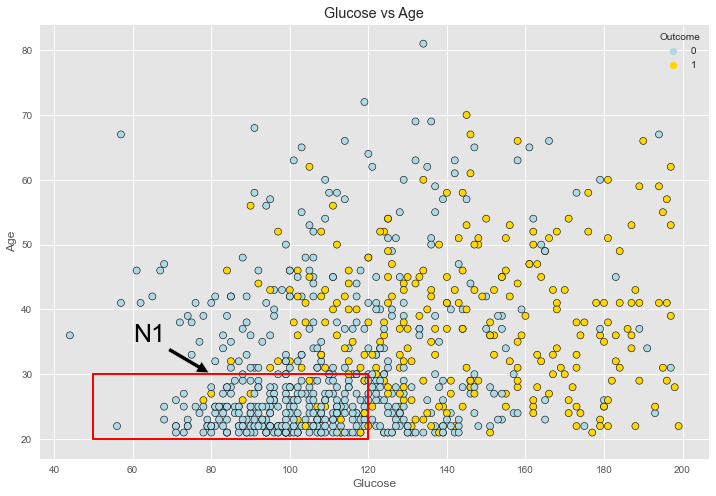

In [38]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N1', size=25, color='black', xy=(80, 30), xytext=(60, 35),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([50, 120], [30, 30], linewidth=2, color = 'red')
plt.plot([120, 120], [20, 30], linewidth=2, color = 'red')
plt.plot([50, 120], [20, 20], linewidth=2, color = 'red')
plt.plot([50, 50], [20, 30], linewidth=2, color = 'red')
plt.title('Glucose vs Age')
plt.show()

In [39]:
data.loc[:,'N1']=0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'N1']=1

In [40]:
barplot('N1', ':Glucose <= 120 and Age <= 30')

In [41]:
plot_pie('N1', '(Glucose <= 120 and Age <= 30)')

* **BMI **

According to wikipedia "The body mass index (BMI) or Quetelet index is a value derived from the mass (weight) and height of an individual. The BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m2, resulting from mass in kilograms and height in metres."

30 kg/m² is the limit to obesity

In [42]:
data.loc[:,'N2']=0
data.loc[(data['BMI']<=30),'N2']=1

In [43]:
barplot('N2', ': BMI <= 30')

In [44]:
plot_pie('N2', 'BMI <= 30')

* **Pregnancies and Age**

In [45]:
plot_feat1_feat2('Pregnancies','Age')

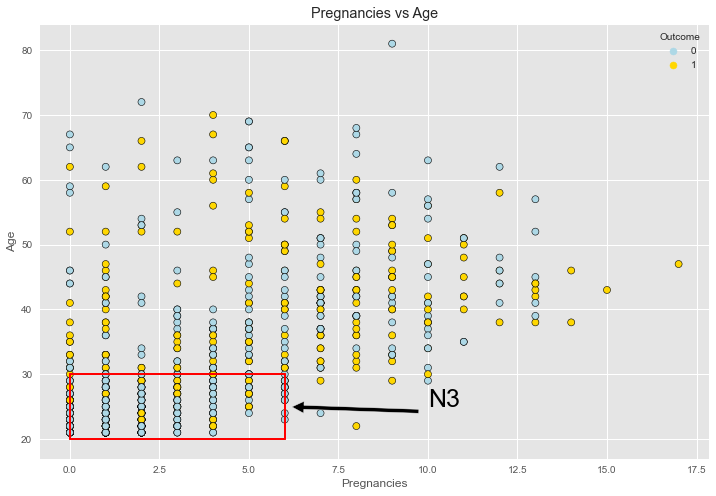

In [46]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Pregnancies'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N3', size=25, color='black', xy=(6, 25), xytext=(10, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 6], [30, 30], linewidth=2, color = 'red')
plt.plot([6, 6], [20, 30], linewidth=2, color = 'red')
plt.plot([0, 6], [20, 20], linewidth=2, color = 'red')
plt.plot([0, 0], [20, 30], linewidth=2, color = 'red')
plt.title('Pregnancies vs Age')
plt.show()

In [47]:
data.loc[:,'N3']=0
data.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'N3']=1

In [48]:
barplot('N3', ': Age <= 30 and Pregnancies <= 6')

In [49]:
plot_pie('N3', 'Age <= 30 and Pregnancies <= 6')

* **Glucose and BloodPressure**

In [50]:
plot_feat1_feat2('Glucose','BloodPressure')

Healthy persons are concentrate with an blood pressure <= 80 and glucose <= 105

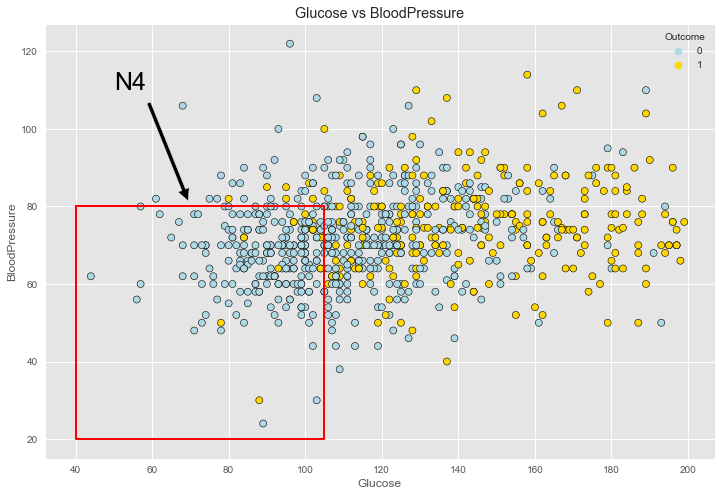

In [51]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['BloodPressure'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N4', size=25, color='black', xy=(70, 80), xytext=(50, 110),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([40, 105], [80, 80], linewidth=2, color = 'red')
plt.plot([40, 40], [20, 80], linewidth=2, color = 'red')
plt.plot([40, 105], [20, 20], linewidth=2, color = 'red')
plt.plot([105, 105], [20, 80], linewidth=2, color = 'red')
plt.title('Glucose vs BloodPressure')
plt.show()

In [52]:
data.loc[:,'N4']=0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'N4']=1

In [53]:
barplot('N4', ': Glucose <= 105 and BloodPressure <= 80')

In [54]:
plot_pie('N4', 'Glucose <= 105 and BloodPressure <= 80')

* **SkinThickness**

In [55]:
data.loc[:,'N5']=0
data.loc[(data['SkinThickness']<=20) ,'N5']=1

In [56]:
barplot('N5', ':SkinThickness <= 20')

In [57]:
plot_pie('N5', 'SkinThickness <= 20')

* **SkinThickness and BMI**

In [58]:
plot_feat1_feat2('SkinThickness','BMI')

Healthy persons are concentrate with a BMI < 30 and skin thickness <= 20

In [59]:
data.loc[:,'N6']=0
data.loc[(data['BMI']<30) & (data['SkinThickness']<=20),'N6']=1

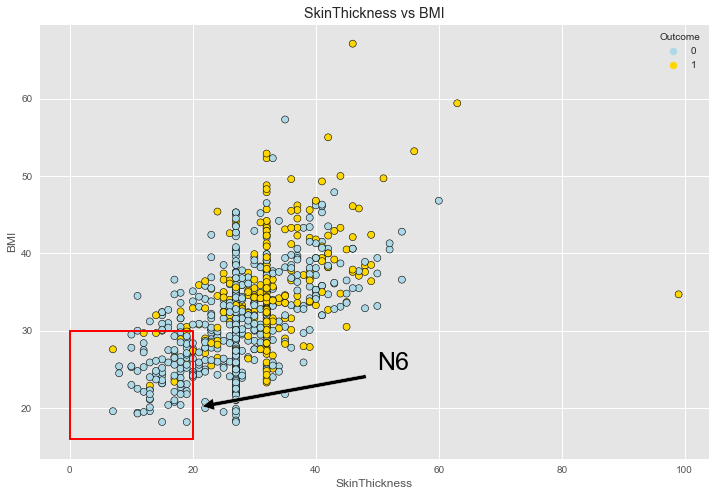

In [60]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['SkinThickness'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('SkinThickness vs BMI')
plt.show()

In [61]:
barplot('N6', ': BMI < 30 and SkinThickness <= 20')

In [62]:
plot_pie('N6', 'BMI < 30 and SkinThickness <= 20')

* **Glucose and BMI**

In [63]:
plot_feat1_feat2('Glucose','BMI')

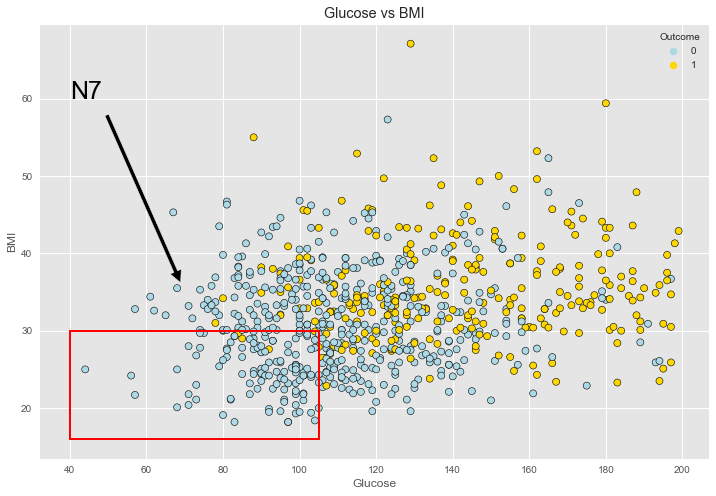

In [64]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N7', size=25, color='black', xy=(70, 35), xytext=(40, 60),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([105, 105], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 40], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 105], [16, 16], linewidth=2, color = 'red')
plt.plot([40, 105], [30, 30], linewidth=2, color = 'red')
plt.title('Glucose vs BMI')
plt.show()

In [65]:
data.loc[:,'N7']=0
data.loc[(data['Glucose']<=105) & (data['BMI']<=30),'N7']=1

In [66]:
barplot('N7', ': Glucose <= 105 and BMI <= 30')

In [67]:
plot_pie('N7', 'Glucose <= 105 and BMI <= 30')

* **Insulin**

In [68]:
plot_distribution('Insulin', 0)

In [69]:
data.loc[:,'N9']=0
data.loc[(data['Insulin']<200),'N9']=1

In [70]:
barplot('N9', ': Insulin < 200')

In [71]:
plot_pie('N9', 'Insulin < 200')

* **BloodPressure**

In [72]:
data.loc[:,'N10']=0
data.loc[(data['BloodPressure']<80),'N10']=1

In [73]:
barplot('N10', ': BloodPressure < 80')

In [74]:
plot_pie('N10', 'BloodPressure < 80')

* **Pregnancies**

In [75]:
plot_distribution('Pregnancies', 0)

In [76]:
data.loc[:,'N11']=0
data.loc[(data['Pregnancies']<4) & (data['Pregnancies']!=0) ,'N11']=1

In [77]:
barplot('N11', ': Pregnancies > 0 and < 4')

In [78]:
plot_pie('N11', 'Pregnancies > 0 and < 4')

* **Others**

In [79]:
data['N0'] = data['BMI'] * data['SkinThickness']

data['N8'] =  data['Pregnancies'] / data['Age']

data['N13'] = data['Glucose'] / data['DiabetesPedigreeFunction']

data['N12'] = data['Age'] * data['DiabetesPedigreeFunction']

data['N14'] = data['Age'] / data['Insulin']


In [80]:
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

* ** Did you watch Inception ? ** Here is the same! It's not a dream in a dream but a new feature extract from a new feature

In [81]:
plot_distribution('N0', 0)

In [82]:
data.loc[:,'N15']=0
data.loc[(data['N0']<1034) ,'N15']=1

In [83]:
barplot('N15', ': N0 < 1034')

In [84]:
plot_pie('N15', 'N0 < 1034')

# <a id='5'>5. Prepare dataset</a> 

## <a id='5.1'>5.1. StandardScaler and LabelEncoder</a> 

* ** StandardScaler** :

Standardize features by removing the mean and scaling to unit variance : 

![](http://image.noelshack.com/fichiers/2019/06/1/1549282952-0-0-0-0-0-0.png)

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the set. Mean and standard deviation are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

* ** LabelEncoder** : Encode labels with value between 0 and n_classes-1.

Bellow we encode the data to feed properly to our algorithm

In [85]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

Now, we can compute correlation matrix 

## <a id='5.2'>5.2. Correlation Matrix</a> 

A **correlation matrix** is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation.

In [86]:
def correlation_plot():
    #correlation
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)


In [87]:
correlation_plot()

## <a id='6'>6. Machine Learning</a> 

## <a id='6.1'>6.1. Decision Tree</a> 
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.  It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision making. It can be visualized like a flowchart diagram which easily mimics human level thinking. That is why decision trees are easy to understand and interpret.

![](graphics/figure1.jpeg)

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.  

## <a id='6.2'>6.2. How does the Decision Tree algorithm work?</a> 

* **Discrimination Threshold** :
A visualization of precision, recall, f1 score, and queue rate with respect to the discrimination threshold of a binary classifier. The discrimination threshold is the probability or score at which the positive class is chosen over the negative class

The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Start tree building by repeating this process recursively for each child until one of the condition will match:
    - All the tuples belong to the same attribute value.
    - There are no more remaining attributes.
    - There are no more instances.
    
![](graphics/figure2.jpeg)

## Attribute Selection Measures

Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute ([Source](http://www.ijoart.org/docs/Construction-of-Decision-Tree--Attribute-Selection-Measures.pdf)). In the case of a continuous-valued attribute, split points for branches also need to define.  Most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

### Information Gain     

Shannon invented the concept of entropy, which measures the impurity of the input set. In physics and mathematics, entropy referred as the randomness or the impurity in the system. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. ID3 (Iterative Dichotomiser) decision tree algorithm uses information gain.

$$\textrm{Info}(D) = -\sum_{i = 1}^{m} p_i\log_2 p_i$$



Where, Pi is the probability that an arbitrary tuple in D belongs to class Ci.

$$\textrm{Info}_A(D) = \sum_{j = 1}^{V} \dfrac{|D_j|}{|D|} \textrm{ x }\textrm{Info}(D_j)$$

$$\textrm{Gain}(A) = \textrm{Info}(D) - \textrm{Info}_A(D)$$




Where:

- **Info(D)** is the average amount of information needed to identify the class label of a tuple in D.
- **|Dj|/|D|** acts as the weight of the jth partition.
- **InfoA(D)** is the expected information required to classify a tuple from D based on the partitioning by A.

The attribute A with the highest information gain, **Gain(A)**, is chosen as the splitting attribute at node N().

### Gain Ratio

Information gain is biased for the attribute with many outcomes. It means it prefers the attribute with a large number of distinct values.  For instance, consider an attribute with a unique identifier such as customer_ID has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning.

C4.5, an improvement of ID3, uses an extension to information gain known as the gain ratio. Gain ratio handles the issue of bias by normalizing the information gain using Split Info.  Java implementation of the C4.5 algorithm is known as J48,  which is available in WEKA data mining tool.

$$ \textrm{SplitInfo}_A(D) = - \sum_{j = 1}^{V} \dfrac{|D_j|}{|D|} \textrm{ x } log_2(\frac{|D_j|}{|D|})$$

Where:
- |Dj|/|D| acts as the weight of the jth partition.
- v is the number of discrete values in attribute A.

The gain ratio can be defined as:

$$ \textrm{GainRatio}(A) = \dfrac{\textrm{Gain(A)}}{\textrm{SplitInfo}_A(D)} $$

The attribute with the highest gain ratio is chosen as the splitting attribute ([Source](http://www.enggjournals.com/ijcse/doc/IJCSE10-02-09-092.pdf)).

### Gini index

Another decision tree algorithm CART (Classification and Regression Tree) uses the Gini method to create split points.

$$Gini(D) = 1 - \sum_{i = 1}^{m} P_i^2 $$

Where, pi is the probability that a tuple in D belongs to class Ci.

The Gini Index considers a binary split for each attribute. You can compute a weighted sum of the impurity of each partition. If a binary split on attribute A partitions data D into D1 and D2, the Gini index of D is:

$$Gini_A(D) = \frac{|D_1|}{D} Gini(D_1) + \frac{D_2}{D} Gini(D_2)$$

In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point.

$$ \Delta Gini(A) = Gini(D) - Gini_A(D)$$


The attribute with minimum Gini index is chosen as the splitting attribute.

## <a id='6.3'>6.3. Decision Tree Classifier Building in Scikit-learn</a> 
### Importing Required Libraries

Let's first install the required packages and load the required libraries.

In [92]:
#!pip install --quiet -r requirements.txt; 

In [93]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Loading Data

Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function. You can download the data [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).


In [100]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("./data/pima-indians-diabetes.csv", header=None, names=col_names)

In [101]:
pima.head()

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

### Feature Selection

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [102]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.


In [103]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test|

### Building Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn.

In [104]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [105]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


Well, you got a classification rate of 67.09%, considered as good accuracy. You can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

### Visualizing Decision Trees

You can use Scikit-learn's `plot_tree` function from the tree module to display the tree within a Jupyter notebook. 

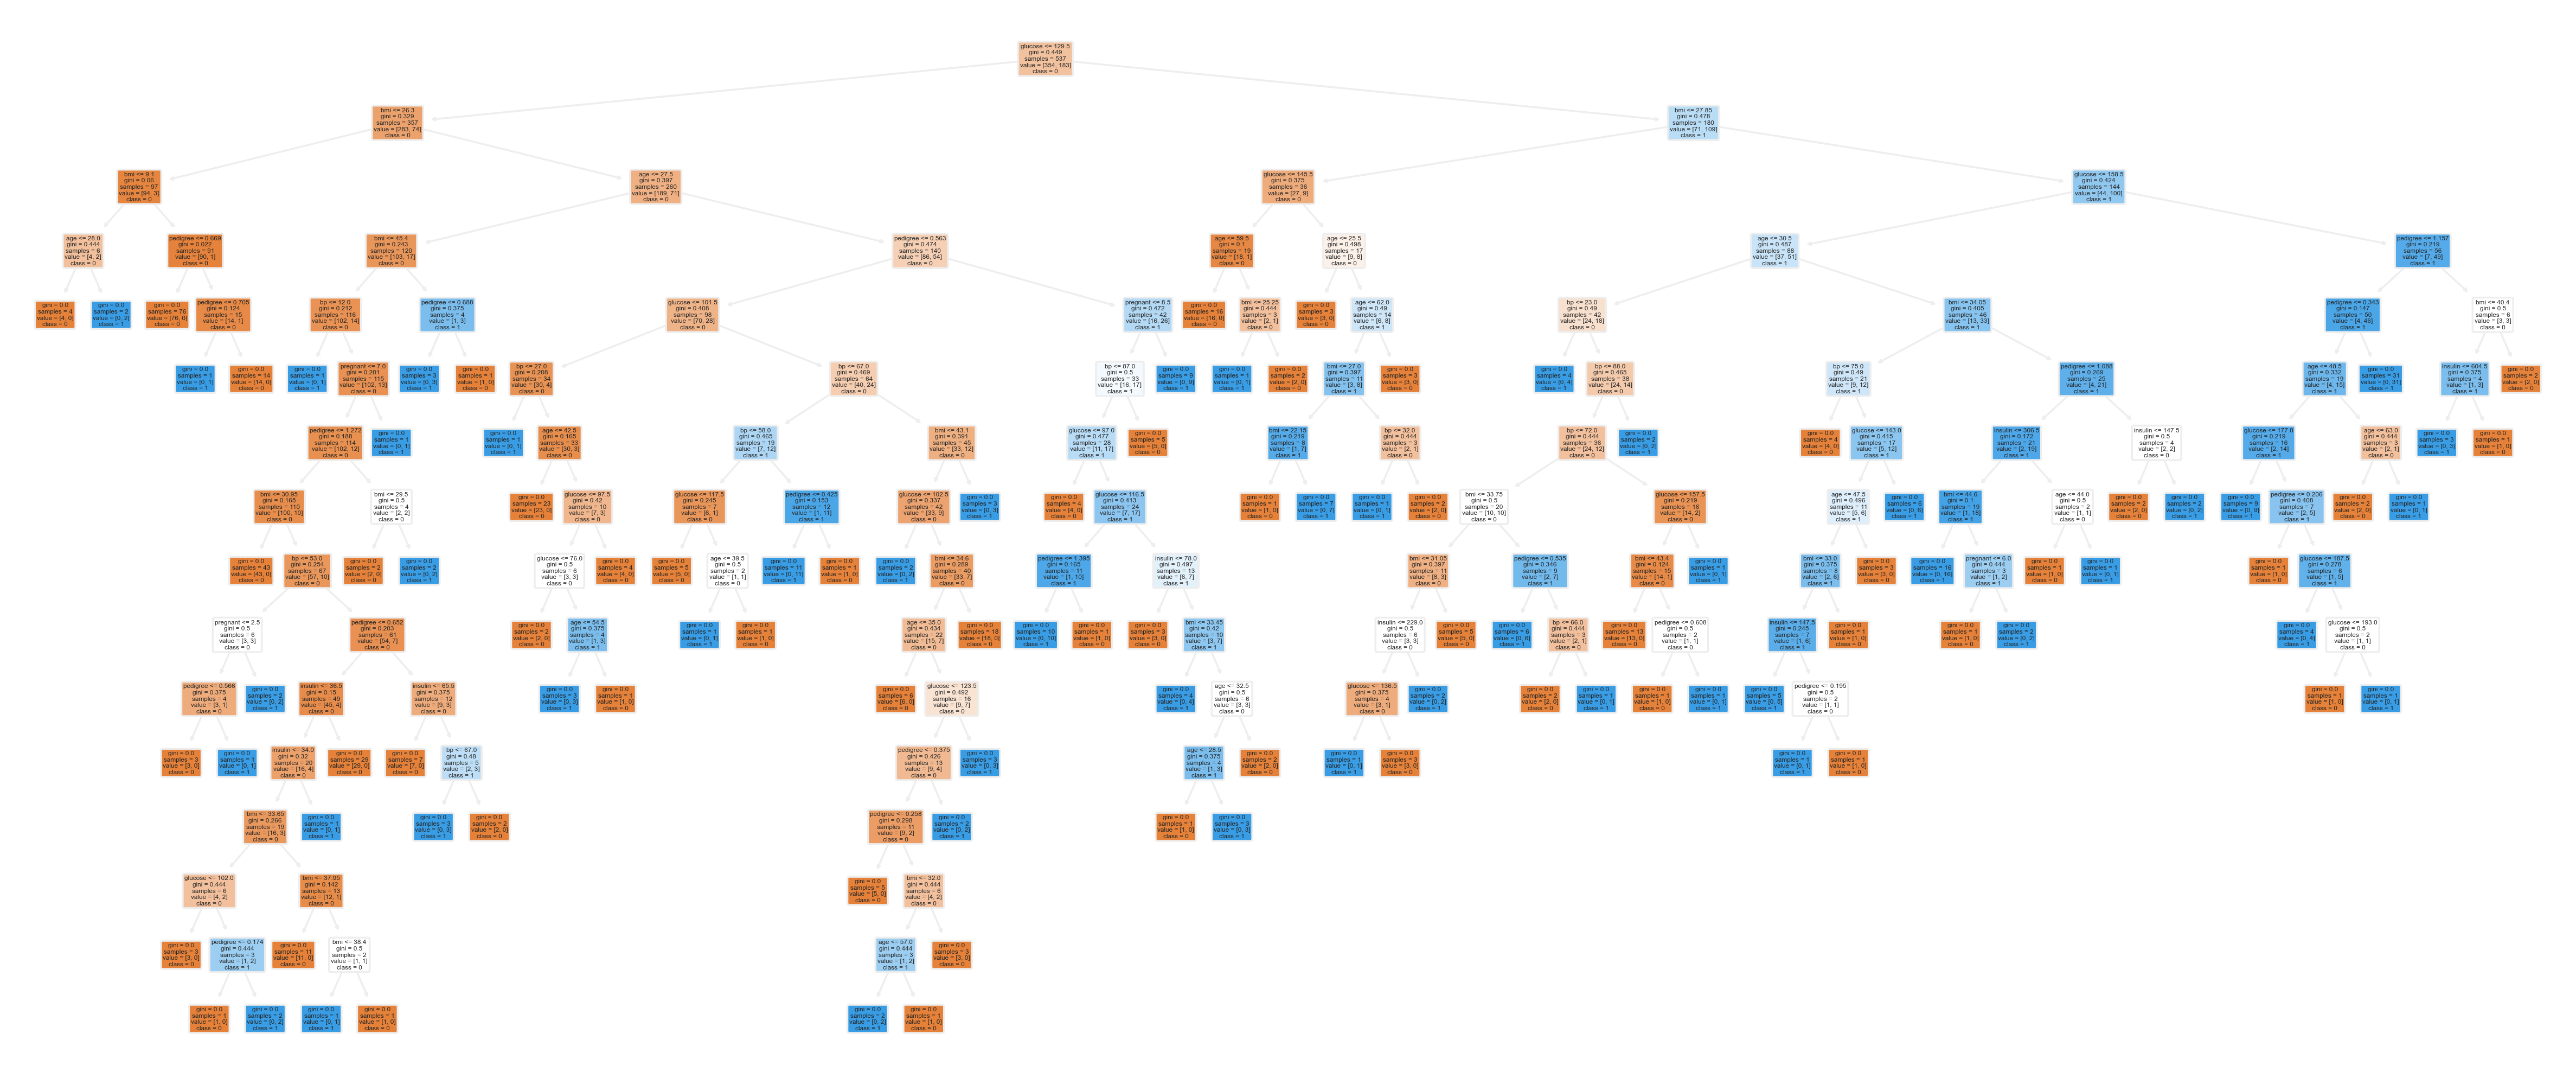

In [107]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi=500)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('graphics/dtree.png')

Open up `dtree.png` that was generated inside the graphics folder and zoom in to inspect the decision tree chart. 


In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.  

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.


## Optimizing Decision Tree Performance

- **criterion :  optional (default=”gini”) or Choose attribute selection measure**: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- **splitter : string, optional (default=”best”) or Split Strategy**: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- **max_depth : int or None, optional (default=None) or Maximum Depth of a Tree**: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting ([Source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3.  Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.


In [108]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


Well, the classification rate increased to 77.05%, which is better accuracy than the previous model.

### Visualizing Decision Trees again

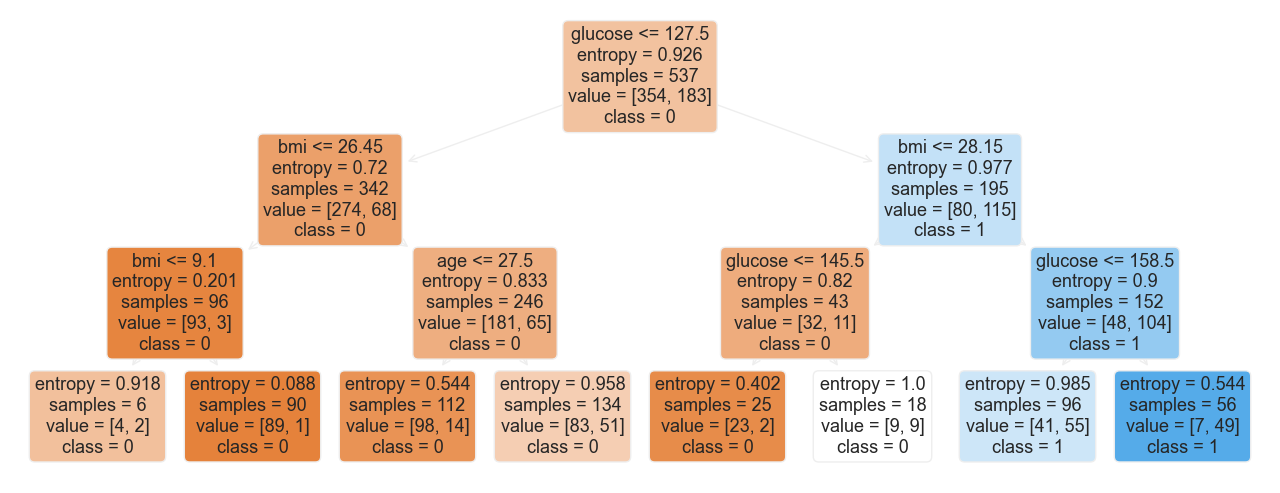

In [109]:
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('graphics/diabetes.png')

## <a id='6.4'>6.4. Model Performance</a> 

To measure the performance of a model, we need several elements :

This part is essential

* **Confusion matrix** : also known as the error matrix, allows visualization of the performance of an algorithm :

    * true positive (TP) : Diabetic correctly identified as diabetic
    * true negative (TN) : Healthy correctly identified as healthy
    * false positive (FP) : Healthy incorrectly identified as diabetic
    * false negative (FN) : Diabetic incorrectly identified as healthy

![](https://image.noelshack.com/fichiers/2018/20/5/1526651914-cs-heezweaa5hp7.jpg)

* **Metrics ** :

    * Accuracy : (TP +TN) / (TP + TN + FP +FN)
    * Precision : TP / (TP + FP)
    * Recall : TP / (TP + FN)
    * F1 score : 2 x ((Precision x Recall) / (Precision + Recall))

* **Roc Curve** : The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

![](http://image.noelshack.com/fichiers/2019/06/1/1549284841-0-0-0-0-0-0-0-0-0-0.png)

* **Precision Recall Curve** :  shows the tradeoff between precision and recall for different threshold

### Confusion Matrix

<AxesSubplot:>

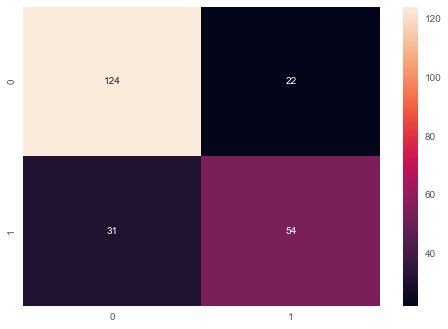

In [118]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,annot = True, fmt = "d")

### Metrics

#### Precision

In [126]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision: ",precision)

Precision:  0.7105263157894737


#### recall

In [127]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall is: ",recall)

Recall is:  0.6352941176470588


#### fscore

In [128]:
print((2*precision*recall)/(precision+recall))

0.6708074534161491


This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

## Pros

- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.
([Source](https://scikit-learn.org/stable/modules/tree.html))

## Cons

- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

## Conclusion

Congratulations, you have made it to the end of this tutorial!

In this Notebook, I had covered a lot of details about how can do a better EDA and then using a Decision Tree; It's working, attribute selection measures such as Information Gain, Gain Ratio, and Gini Index, decision tree model building, visualization and evaluation on diabetes dataset using Python Scikit-learn package. Also, discussed its pros, cons, and optimizing Decision Tree performance using parameter tuning.

Hopefully, you can now utilize the Decision tree algorithm to analyze your own datasets.

# <a id='7'>7. Credits</a> 

Credits  : 
* https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
* https://en.wikipedia.org/wiki/Body_mass_index
* http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/
* https://www.news-medical.net/health/What-is-Diabetes.aspx
* https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
* http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* https://www.scikit-yb.org/en/latest/api/classifier/threshold.html
* https://www.analyticsindiamag.com/why-is-random-search-better-than-grid-search-for-machine-learning/
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
* https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* https://twitter.com/bearda24
* https://www.slideshare.net/DhianaDevaRocha/qcon-rio-machine-learning-for-everyone
* https://medium.com/@sebastiannorena/some-model-tuning-methods-bfef3e6544f0
* https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes
* https://en.wikipedia.org/wiki/Pima_people

## Thank you all :)